<h1> 1: Import Modules </h1>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

/home/hardik/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


<h1> 2: Basic Data Information </h1>

In [2]:
#Loading dataset
train = pd.read_csv("../Datasets/train.csv")    #train dataset
test  = pd.read_csv("../Datasets/test.csv")     #test dataset

features = train.columns.drop(['id', 'target']) #dropped id and target                      

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

Train Shape: (250, 302)
Test Shape: (19750, 301)


In [3]:
train.head()    #printing inital rows of head data

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [4]:
test.head()     #printing initial rows of test data

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463
3,253,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,...,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529
4,254,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,...,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825


In [5]:
#Checking if NULL or missing values exist
print("Count of NAN in train :",train.isnull().sum().sum())

print("Count of NAN in test :",test.isnull().sum().sum())


Count of NAN in train : 0
Count of NAN in test : 0


In [6]:
train.target.describe()   #printing distribution of target variable

count    250.000000
mean       0.640000
std        0.480963
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

<h1> 3: Range of mean and standard deviation of the features in the training set: </h1>

In [7]:
feat = train.drop(['id','target'], axis=1)   #all features
std_feat = feat.std(axis=1)                  #standard deviation of features
mean_feat = feat.mean(axis=1)                #mean of features
print("Mean :")
mean_feat

Mean :


0     -0.009223
1      0.086130
2      0.027657
3      0.088357
4      0.134413
         ...   
245   -0.022233
246    0.017820
247   -0.087237
248    0.036570
249    0.030730
Length: 250, dtype: float64

In [8]:
print("Standard Deviation :")
std_feat

Standard Deviation :


0      1.089171
1      0.985838
2      1.012757
3      0.939743
4      0.941277
         ...   
245    1.081211
246    0.979557
247    1.042626
248    1.017994
249    0.947306
Length: 250, dtype: float64

<h3> As can be Observed from above, the standard deviations of the values are relatively small and hence there is no need to scale the data. </h3>

<h1> 4: Test for overfitting data :</h1>

In [9]:
#Data for model
x_train = train.drop(['id', 'target'], axis=1)     #feature matrix
y_train = train['target']                          #target column
x_test = test.drop(['id'], axis=1)                 #feature matrix for test
#Model instance
logisticRegr = LogisticRegression(solver = 'liblinear')
logisticRegr.fit(x_train, y_train)                 #training

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#Predict for multiple observations
predictions = logisticRegr.predict(x_test)
# Measuring model performance
score_train = logisticRegr.score(x_train, y_train)
print("Train Score :", str(score_train*100)+" %")
print("Test Score (AUC) evaluated by Kaggle :",str(66.2)+" %")

Train Score : 100.0 %
Test Score (AUC) evaluated by Kaggle : 66.2 %


<h2>Analysis :</h2>
<h3>A good fit is achieved of the model on the training data, while it does not generalize well on new, unseen data. The model learned patterns specific to the training data, which are irrelevant in other data. Accuracy achieved on the training data in 100% while the AUC score is  0.662 on the test data evaluated by Kaggle thus, the model clearly overfits on the dataset.</h3>
<h3>Fitting high dimensional data with very low number of instances as in this case has led overfitting due to high complexity.</h3>
<br>

<h1> 5: Avoid overfitting with feature selection and dimensionality reduction :</h1>

<h2>Extra Trees Classifier is being used for feature selection. It is an ensemble learning method fundamentally based on decision trees. Like Random Forest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting</h2>

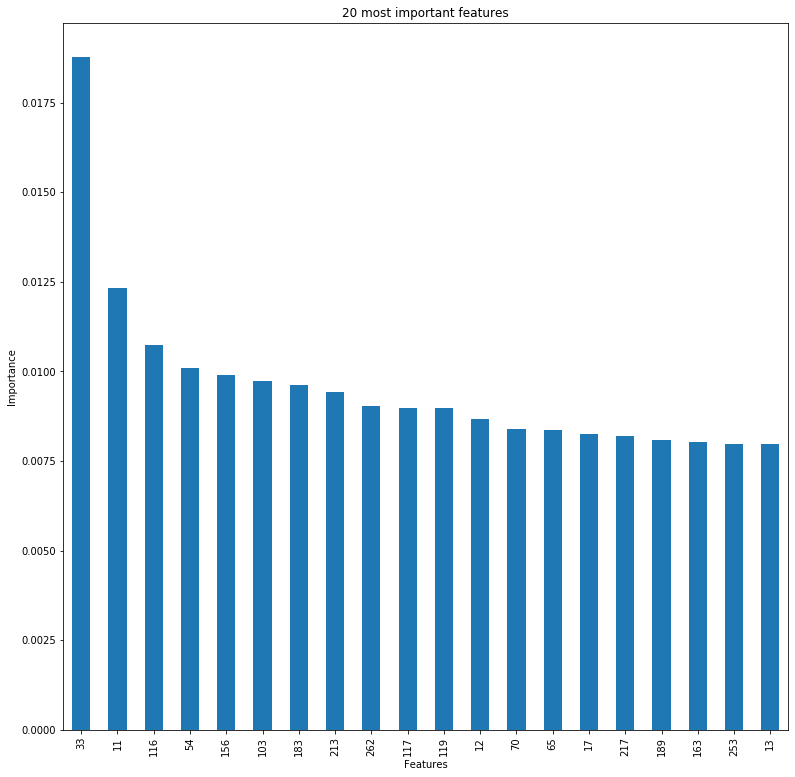

In [11]:
# Feature Selection using Feature Importance
# 20 important features :

#Dropping id and target column as they are not part of the features
x = train.drop(['id', 'target'], axis=1) #independent columns
#The target column in train set
y = train['target']
#Object to extra trees classifier to select significant features  
model = ExtraTreesClassifier(n_estimators = 10)
#Fitting the model on the data
model.fit(x,y)
#print(model.feature_importances_) #inbuilt class feature_importances of tree based classifiers
#plot graph of feature importance
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
#Picking 20 features with largest importance values
feat_importances.nlargest(20).plot(kind='bar', figsize=(13,13))
#Adding title to the plot
plt.title("20 most important features")
#Adding xlabel
plt.xlabel("Features")
#Adding ylabel
plt.ylabel("Importance")
#Plot
plt.show()

In [12]:
#create an index array, with the number of features
idx = np.arange(0, x.shape[1])
#Features with importance level greater than the mean importance level
features_to_keep = idx[feat_importances > np.mean(feat_importances)]
features_to_keep

array([  0,   2,   5,   7,   8,   9,  11,  12,  13,  14,  16,  17,  20,
        22,  25,  26,  27,  33,  34,  35,  39,  40,  41,  45,  46,  47,
        51,  54,  57,  61,  63,  64,  65,  66,  67,  70,  71,  75,  78,
        79,  80,  81,  83,  87,  89,  90,  91,  95, 101, 103, 105, 111,
       116, 117, 119, 121, 122, 123, 124, 126, 128, 129, 131, 133, 137,
       138, 140, 141, 143, 147, 148, 150, 155, 156, 157, 160, 163, 167,
       170, 171, 173, 180, 183, 185, 186, 187, 189, 190, 192, 195, 199,
       201, 202, 207, 209, 212, 213, 214, 215, 217, 220, 221, 230, 231,
       232, 234, 236, 237, 238, 241, 244, 248, 250, 253, 260, 261, 262,
       265, 267, 269, 270, 271, 274, 275, 277, 279, 280, 287, 293, 295,
       297, 299])

In [13]:
#Heatmap of correlated features
#get correlations of features in dataset whose importance is greater than the mean importance
imp_25_feat = feat_importances.nlargest(25)
print("25 most Significant features :")
#Printing the 25 most significant features with their importance values
print(imp_25_feat)

25 most Significant features :
33     0.018785
11     0.012321
116    0.010737
54     0.010096
156    0.009888
103    0.009720
183    0.009611
213    0.009424
262    0.009042
117    0.008990
119    0.008982
12     0.008676
70     0.008405
65     0.008369
17     0.008255
217    0.008188
189    0.008073
163    0.008024
253    0.007982
13     0.007971
67     0.007913
83     0.007837
129    0.007825
230    0.007818
293    0.007631
dtype: float64


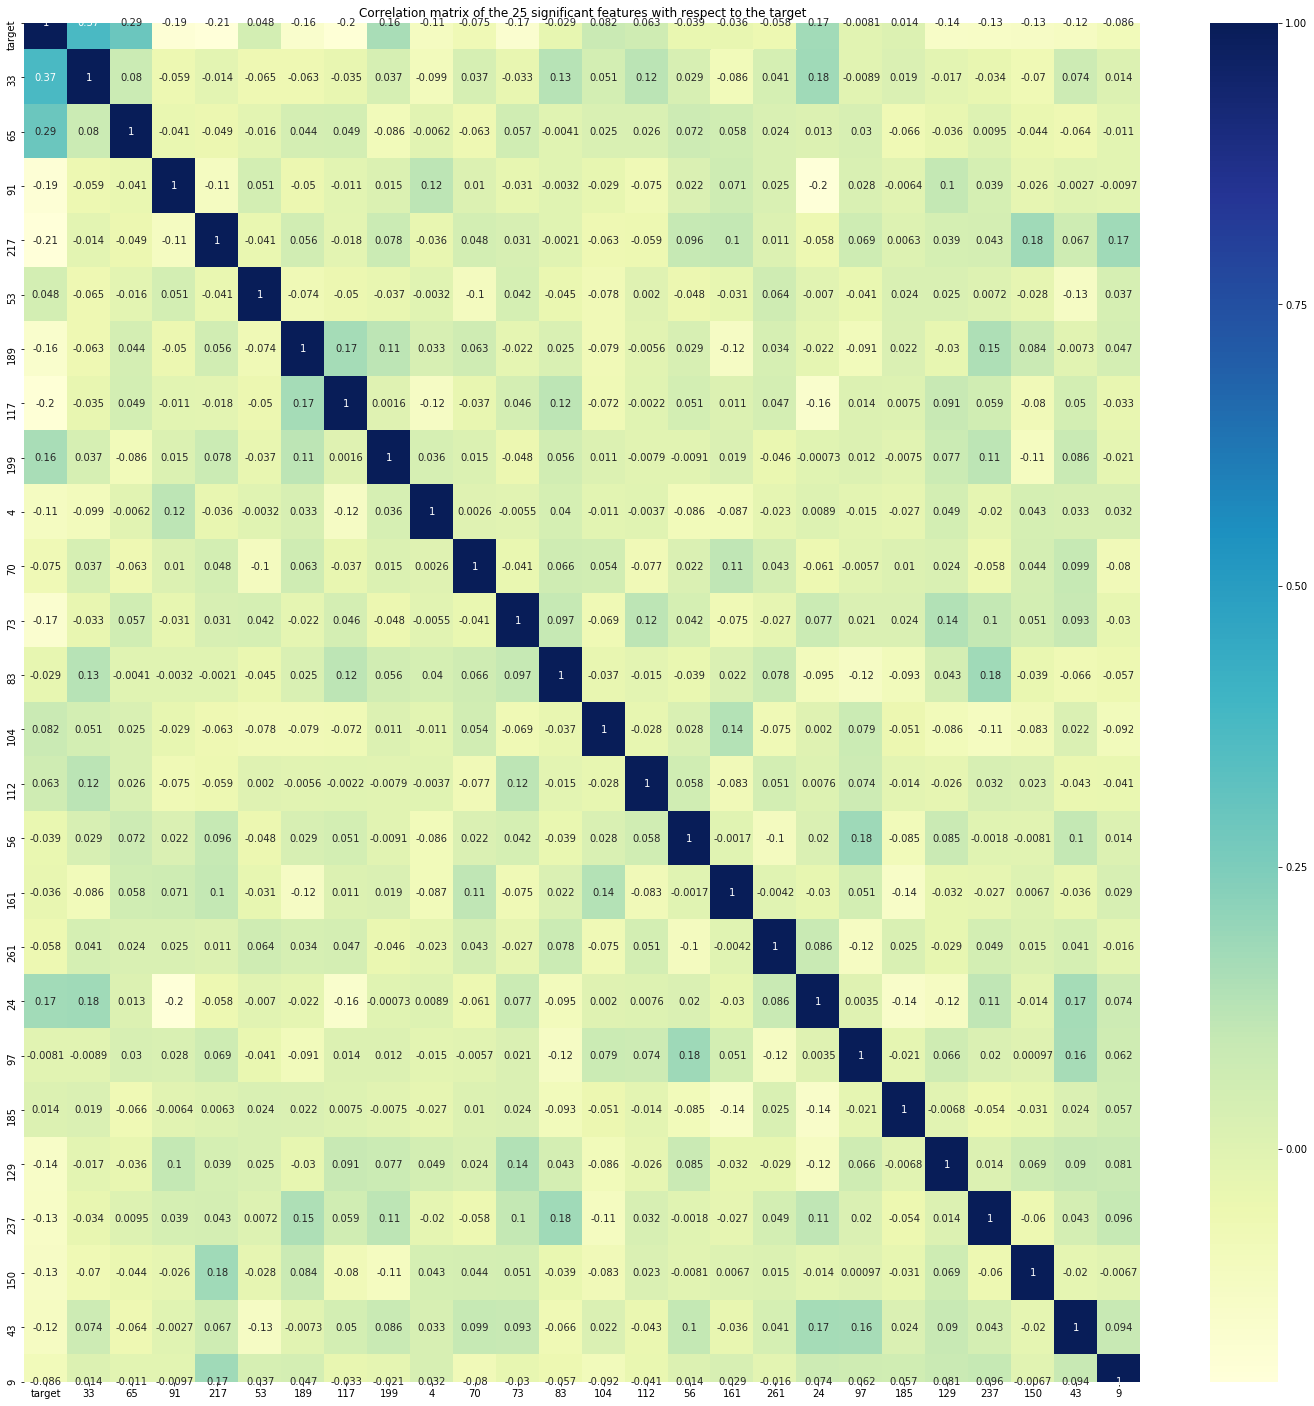

In [14]:
#target correlation matrix
imp_25_feat_list = ['target']
#List of 25 important features
feat_list = ['33','65','91','217','53','189','117','199','4','70','73','83','104','112','56','161','261','24','97','185','129','237','150','43','9']
imp_25_feat_list.extend(feat_list)
#Selecting the respective feature columns
x_feature_selected = train[imp_25_feat_list]
#Plotting correlation matrix with respect to the target
corrmat = x_feature_selected.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#Adding title
plt.title("Correlation matrix of the 25 significant features with respect to the target")
#Adding x axis label
plt.xlabel("Features")
#Adding y axis label
plt.ylabel("Features")
#Plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="YlGnBu") #RdYlGn

<h2>It is evident by the correlation matrix that the significant features are not highly correlated. Thus, we can look at methods like dimensionality reduction.</h2>

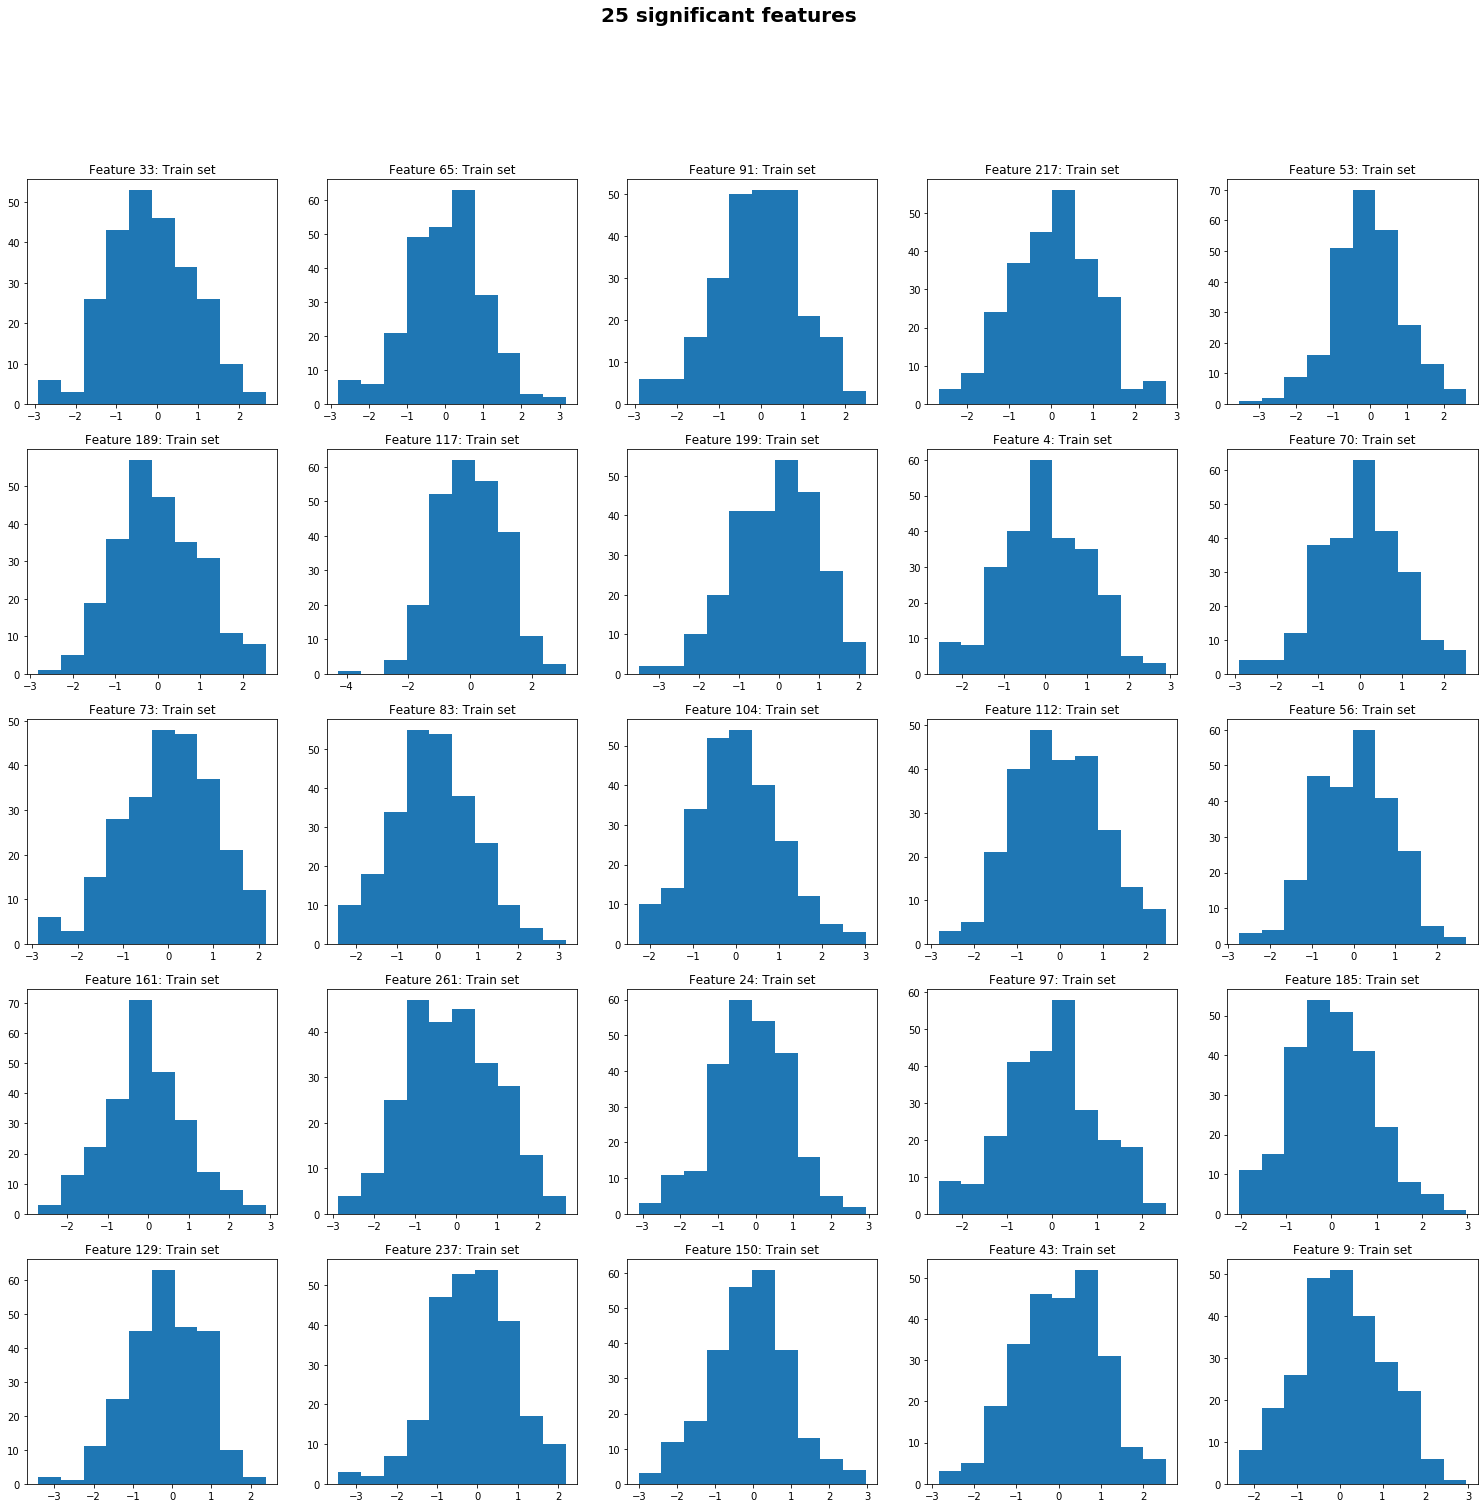

In [15]:
# Histogram plot of 25 significant features
train_plt = train[feat_list]
plt.figure(figsize=(26, 24))
#Adding title
plt.suptitle("25 significant features",fontsize=20, fontweight="bold")
#Plotting the histograms for the significant features.
for i, col in enumerate(list(train_plt.columns)):
    #Grid of 5x5
    plt.subplot(5, 5, i + 1)
    #Plot hist
    plt.hist(train_plt[col])
    #Add title
    plt.title('Feature {}: Train set'.format(col))

<h2>It can be seen that the most significant features are normally distributed, and they are unimodal.</h2>

<h1> 6: Checking Sequentiality </h1>

<h2> Since the origin of the data is not known, we can safely assume that the data may be a time series. This will change the way we will need to deal with the data at hand and so verifying this is of utmost importance before proceeding further. </h2>

In [16]:
target = train['target']

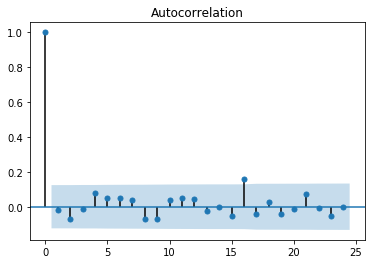

In [17]:
plot_acf(target)
plt.show()

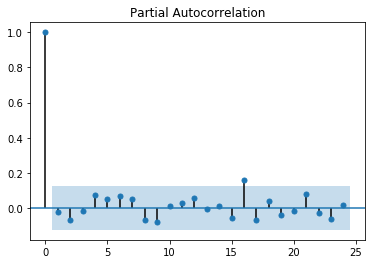

In [18]:
plot_pacf(target)
plt.show()

<h2> As can be seen the ACF and PACF have low values indicating infinitesimal correlation if any between successive data points. Hence we conculde that the data is not a time series. </h2>